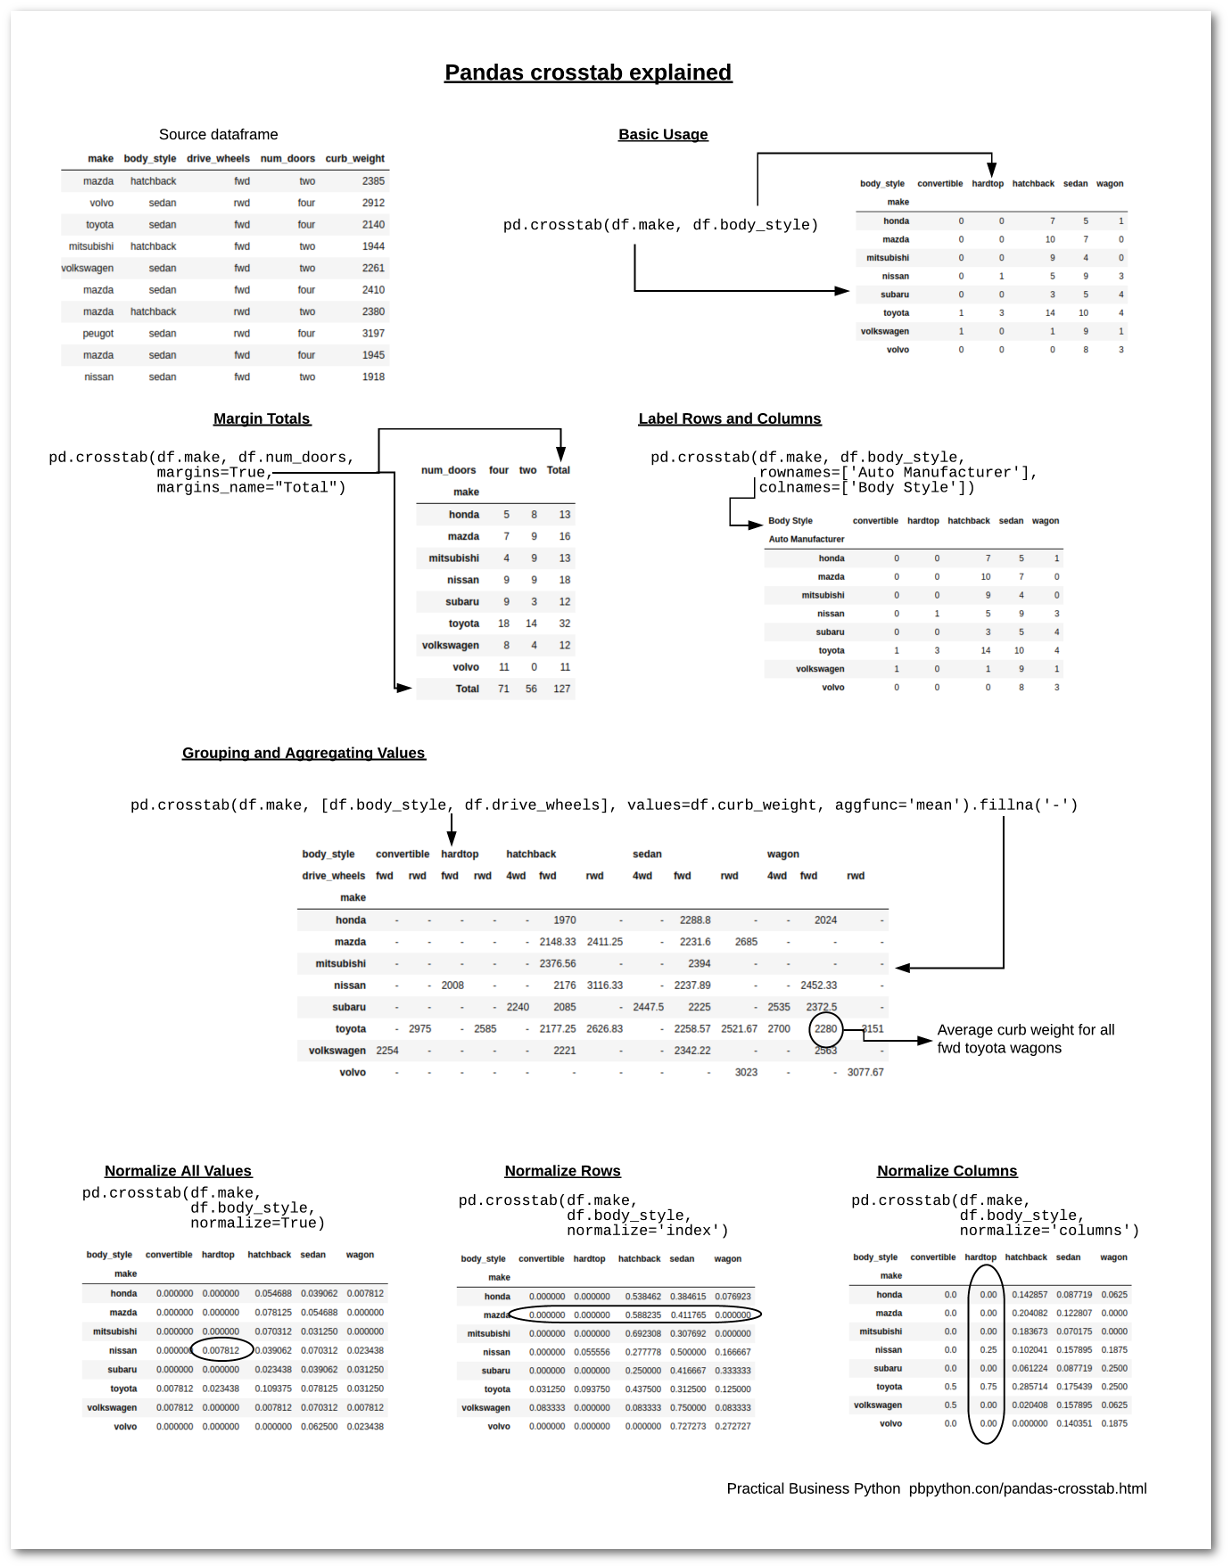

In [82]:
import pandas as pd
import seaborn as sns
from IPython.display import Image
Image("crosstab_cheatsheet.png")

In [2]:
# Define the headers since the data does not have any
headers = ["symboling", "normalized_losses", "make", "fuel_type", "aspiration",
           "num_doors", "body_style", "drive_wheels", "engine_location",
           "wheel_base", "length", "width", "height", "curb_weight",
           "engine_type", "num_cylinders", "engine_size", "fuel_system",
           "bore", "stroke", "compression_ratio", "horsepower", "peak_rpm",
           "city_mpg", "highway_mpg", "price"]

In [3]:
# Read in the CSV file and convert "?" to NaN
df_raw = pd.read_csv("http://mlr.cs.umass.edu/ml/machine-learning-databases/autos/imports-85.data",
                     header=None, names=headers, na_values="?" )

In [4]:
# Define a list of models that we want to review
models = ["toyota","nissan","mazda", "honda", "mitsubishi", "subaru", "volkswagen", "volvo"]

In [5]:
# Create a copy of the data with only the top 8 manufacturers
df = df_raw[df_raw.make.isin(models)].copy()

In [6]:
df.head()

symboling  normalized_losses   make fuel_type aspiration num_doors  \
30          2              137.0  honda       gas        std       two   
31          2              137.0  honda       gas        std       two   
32          1              101.0  honda       gas        std       two   
33          1              101.0  honda       gas        std       two   
34          1              101.0  honda       gas        std       two   

   body_style drive_wheels engine_location  wheel_base  ...  engine_size  \
30  hatchback          fwd           front        86.6  ...           92   
31  hatchback          fwd           front        86.6  ...           92   
32  hatchback          fwd           front        93.7  ...           79   
33  hatchback          fwd           front        93.7  ...           92   
34  hatchback          fwd           front        93.7  ...           92   

    fuel_system  bore  stroke compression_ratio horsepower  peak_rpm city_mpg  \
30         1bbl  2.91    3.41               9.6       58.0    4800.0       49   
31         1bbl  2.91    3.41               9.2       76.0    6000.0       31   
32         1bbl  2.91    3.07              10.1       60.0    5500.0       38   
33         1bbl  2.91    3.41               9.2       76.0    6000.0       30   
34         1bbl  2.91    3.41               9.2       76.0    6000.0       30   

    highway_mpg   price  
30           54  6479.0  
31           38  6855.0  
32           42  5399.0  
33           34  6529.0  
34           34  7129.0  

[5 rows x 26 columns]

In [26]:
df['symboling'].shape

(128,)

In [50]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [51]:
%%timeit
df.query('make == "honda" and fuel_type == "gas" and normalized_losses==137.0')

2.69 ms ± 49.2 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [52]:
df.query('make == "honda" and fuel_type == "gas" and normalized_losses==137.0')

symboling  normalized_losses   make fuel_type aspiration num_doors  \
30          2              137.0  honda       gas        std       two   
31          2              137.0  honda       gas        std       two   

   body_style drive_wheels engine_location  wheel_base  ...  engine_size  \
30  hatchback          fwd           front        86.6  ...           92   
31  hatchback          fwd           front        86.6  ...           92   

    fuel_system  bore  stroke compression_ratio horsepower  peak_rpm city_mpg  \
30         1bbl  2.91    3.41               9.6       58.0    4800.0       49   
31         1bbl  2.91    3.41               9.2       76.0    6000.0       31   

    highway_mpg   price  
30           54  6479.0  
31           38  6855.0  

[2 rows x 26 columns]

In [71]:
mi_df = df.set_index(['make', 'fuel_type', 'normalized_losses'])
mi_df.tail()

symboling aspiration num_doors body_style  \
make  fuel_type normalized_losses                                              
volvo gas       95.0                      -1        std      four      sedan   
                95.0                      -1      turbo      four      sedan   
                95.0                      -1        std      four      sedan   
      diesel    95.0                      -1      turbo      four      sedan   
      gas       95.0                      -1      turbo      four      sedan   

                                  drive_wheels engine_location  wheel_base  \
make  fuel_type normalized_losses                                            
volvo gas       95.0                       rwd           front       109.1   
                95.0                       rwd           front       109.1   
                95.0                       rwd           front       109.1   
      diesel    95.0                       rwd           front       109.1   
      gas       95.0                       rwd           front       109.1   

                                   length  width  height  ...  engine_size  \
make  fuel_type normalized_losses                         ...                
volvo gas       95.0                188.8   68.9    55.5  ...          141   
                95.0                188.8   68.8    55.5  ...          141   
                95.0                188.8   68.9    55.5  ...          173   
      diesel    95.0                188.8   68.9    55.5  ...          145   
      gas       95.0                188.8   68.9    55.5  ...          141   

                                  fuel_system  bore  stroke compression_ratio  \
make  fuel_type normalized_losses                                               
volvo gas       95.0                     mpfi  3.78    3.15               9.5   
                95.0                     mpfi  3.78    3.15               8.7   
                95.0                     mpfi  3.58    2.87               8.8   
      diesel    95.0                      idi  3.01    3.40              23.0   
      gas       95.0                     mpfi  3.78    3.15               9.5   

                                   horsepower  peak_rpm  city_mpg  \
make  fuel_type normalized_losses                                   
volvo gas       95.0                    114.0    5400.0        23   
                95.0                    160.0    5300.0        19   
                95.0                    134.0    5500.0        18   
      diesel    95.0                    106.0    4800.0        26   
      gas       95.0                    114.0    5400.0        19   

                                   highway_mpg    price  
make  fuel_type normalized_losses                        
volvo gas       95.0                        28  16845.0  
                95.0                        25  19045.0  
                95.0                        23  21485.0  
      diesel    95.0                        27  22470.0  
      gas       95.0                        25  22625.0  

[5 rows x 23 columns]

In [69]:
mi_df.loc['honda', 'gas', 137]

/Users/serdar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  """Entry point for launching an IPython kernel.


symboling aspiration num_doors body_style  \
make  fuel_type normalized_losses                                              
honda gas       137.0                      2        std       two  hatchback   
                137.0                      2        std       two  hatchback   

                                  drive_wheels engine_location  wheel_base  \
make  fuel_type normalized_losses                                            
honda gas       137.0                      fwd           front        86.6   
                137.0                      fwd           front        86.6   

                                   length  width  height  ...  engine_size  \
make  fuel_type normalized_losses                         ...                
honda gas       137.0               144.6   63.9    50.8  ...           92   
                137.0               144.6   63.9    50.8  ...           92   

                                  fuel_system  bore  stroke compression_ratio  \
make  fuel_type normalized_losses                                               
honda gas       137.0                    1bbl  2.91    3.41               9.6   
                137.0                    1bbl  2.91    3.41               9.2   

                                   horsepower  peak_rpm  city_mpg  \
make  fuel_type normalized_losses                                   
honda gas       137.0                    58.0    4800.0        49   
                137.0                    76.0    6000.0        31   

                                   highway_mpg   price  
make  fuel_type normalized_losses                       
honda gas       137.0                       54  6479.0  
                137.0                       38  6855.0  

[2 rows x 23 columns]

In [72]:
%%timeit
mi_df.loc['honda', 'gas', 137]

/Users/serdar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  """Entry point for launching an IPython kernel.


571 µs ± 8.23 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [7]:
import pandas_profiling

In [9]:
pandas_profiling.ProfileReport(df)

In [10]:
pd.crosstab(df.make, df.body_style)

body_style  convertible  hardtop  hatchback  sedan  wagon
make                                                     
honda                 0        0          7      5      1
mazda                 0        0         10      7      0
mitsubishi            0        0          9      4      0
nissan                0        1          5      9      3
subaru                0        0          3      5      4
toyota                1        3         14     10      4
volkswagen            1        0          1      9      1
volvo                 0        0          0      8      3

### Same thing with groupby

In [12]:
df.groupby(['make', 'body_style'])['body_style'].count()

make        body_style 
honda       hatchback       7
            sedan           5
            wagon           1
mazda       hatchback      10
            sedan           7
mitsubishi  hatchback       9
            sedan           4
nissan      hardtop         1
            hatchback       5
            sedan           9
            wagon           3
subaru      hatchback       3
            sedan           5
            wagon           4
toyota      convertible     1
            hardtop         3
            hatchback      14
            sedan          10
            wagon           4
volkswagen  convertible     1
            hatchback       1
            sedan           9
            wagon           1
volvo       sedan           8
            wagon           3
Name: body_style, dtype: int64

In [13]:
df.groupby(['make', 'body_style'])['body_style'].count().unstack()

body_style  convertible  hardtop  hatchback  sedan  wagon
make                                                     
honda               NaN      NaN        7.0    5.0    1.0
mazda               NaN      NaN       10.0    7.0    NaN
mitsubishi          NaN      NaN        9.0    4.0    NaN
nissan              NaN      1.0        5.0    9.0    3.0
subaru              NaN      NaN        3.0    5.0    4.0
toyota              1.0      3.0       14.0   10.0    4.0
volkswagen          1.0      NaN        1.0    9.0    1.0
volvo               NaN      NaN        NaN    8.0    3.0

In [14]:
df.groupby(['make', 'body_style'])['body_style'].count().unstack().fillna(0)

body_style  convertible  hardtop  hatchback  sedan  wagon
make                                                     
honda               0.0      0.0        7.0    5.0    1.0
mazda               0.0      0.0       10.0    7.0    0.0
mitsubishi          0.0      0.0        9.0    4.0    0.0
nissan              0.0      1.0        5.0    9.0    3.0
subaru              0.0      0.0        3.0    5.0    4.0
toyota              1.0      3.0       14.0   10.0    4.0
volkswagen          1.0      0.0        1.0    9.0    1.0
volvo               0.0      0.0        0.0    8.0    3.0

### Same thing with pivot_table

In [15]:
df.pivot_table(index='make', columns='body_style', aggfunc={'body_style':len}, fill_value=0)

body_style                              
body_style convertible hardtop hatchback sedan wagon
make                                                
honda                0       0         7     5     1
mazda                0       0        10     7     0
mitsubishi           0       0         9     4     0
nissan               0       1         5     9     3
subaru               0       0         3     5     4
toyota               1       3        14    10     4
volkswagen           1       0         1     9     1
volvo                0       0         0     8     3

### Adding Margin to crosstab

In [16]:
pd.crosstab(df.make, df.num_doors, margins=True, margins_name="Total")

num_doors   four  two  Total
make                        
honda          5    8     13
mazda          7    9     16
mitsubishi     4    9     13
nissan         9    9     18
subaru         9    3     12
toyota        18   14     32
volkswagen     8    4     12
volvo         11    0     11
Total         71   56    127

In [17]:
a = pd.crosstab(df.make, df.num_doors, margins=True, margins_name="Total")

In [25]:
import prettypandas as pp
a.pipe(pp.PrettyPandas).style.background_gradient()

In [73]:
pd.crosstab(df.make, df.body_style, values=df.curb_weight, aggfunc='mean').round(0)

body_style  convertible  hardtop  hatchback   sedan   wagon
make                                                       
honda               NaN      NaN     1970.0  2289.0  2024.0
mazda               NaN      NaN     2254.0  2361.0     NaN
mitsubishi          NaN      NaN     2377.0  2394.0     NaN
nissan              NaN   2008.0     2740.0  2238.0  2452.0
subaru              NaN      NaN     2137.0  2314.0  2454.0
toyota           2975.0   2585.0     2370.0  2338.0  2708.0
volkswagen       2254.0      NaN     2221.0  2342.0  2563.0
volvo               NaN      NaN        NaN  3023.0  3078.0

In [74]:
pd.crosstab(df.make, df.body_style)

body_style  convertible  hardtop  hatchback  sedan  wagon
make                                                     
honda                 0        0          7      5      1
mazda                 0        0         10      7      0
mitsubishi            0        0          9      4      0
nissan                0        1          5      9      3
subaru                0        0          3      5      4
toyota                1        3         14     10      4
volkswagen            1        0          1      9      1
volvo                 0        0          0      8      3

In [75]:
pd.crosstab(df.make, df.body_style, normalize=True)

body_style  convertible   hardtop  hatchback     sedan     wagon
make                                                            
honda          0.000000  0.000000   0.054688  0.039062  0.007812
mazda          0.000000  0.000000   0.078125  0.054688  0.000000
mitsubishi     0.000000  0.000000   0.070312  0.031250  0.000000
nissan         0.000000  0.007812   0.039062  0.070312  0.023438
subaru         0.000000  0.000000   0.023438  0.039062  0.031250
toyota         0.007812  0.023438   0.109375  0.078125  0.031250
volkswagen     0.007812  0.000000   0.007812  0.070312  0.007812
volvo          0.000000  0.000000   0.000000  0.062500  0.023438

This table shows us that `2.3% of the total population are Toyota hardtops` and `6.25% are Volvo sedans`.

In [76]:
pd.crosstab(df.make, df.body_style, normalize='columns')

body_style  convertible  hardtop  hatchback     sedan   wagon
make                                                         
honda               0.0     0.00   0.142857  0.087719  0.0625
mazda               0.0     0.00   0.204082  0.122807  0.0000
mitsubishi          0.0     0.00   0.183673  0.070175  0.0000
nissan              0.0     0.25   0.102041  0.157895  0.1875
subaru              0.0     0.00   0.061224  0.087719  0.2500
toyota              0.5     0.75   0.285714  0.175439  0.2500
volkswagen          0.5     0.00   0.020408  0.157895  0.0625
volvo               0.0     0.00   0.000000  0.140351  0.1875

Looking at just the convertible column, you can see that `50% of the convertibles are made by Toyota` and `the other 50% by Volkswagen`.

In [77]:
pd.crosstab(df.make, df.body_style, normalize='index')

body_style  convertible   hardtop  hatchback     sedan     wagon
make                                                            
honda          0.000000  0.000000   0.538462  0.384615  0.076923
mazda          0.000000  0.000000   0.588235  0.411765  0.000000
mitsubishi     0.000000  0.000000   0.692308  0.307692  0.000000
nissan         0.000000  0.055556   0.277778  0.500000  0.166667
subaru         0.000000  0.000000   0.250000  0.416667  0.333333
toyota         0.031250  0.093750   0.437500  0.312500  0.125000
volkswagen     0.083333  0.000000   0.083333  0.750000  0.083333
volvo          0.000000  0.000000   0.000000  0.727273  0.272727

This view of the data shows that of the Mitsubishi cars in this dataset, `69.23% are hatchbacks and the remainder (30.77%) are sedans`.

### Grouping

In [80]:
pd.crosstab(df.make, [df.body_style, df.drive_wheels]).pipe(pp.PrettyPandas).style.background_gradient()

In [81]:
pd.crosstab([df.make, df.num_doors], [df.body_style, df.drive_wheels],
            rownames=['Auto Manufacturer', "Doors"],
            colnames=['Body Style', "Drive Type"],
            dropna=False)

Body Style              convertible         hardtop         hatchback          \
Drive Type                      4wd fwd rwd     4wd fwd rwd       4wd fwd rwd   
Auto Manufacturer Doors                                                         
honda             four            0   0   0       0   0   0         0   0   0   
                  two             0   0   0       0   0   0         0   7   0   
mazda             four            0   0   0       0   0   0         0   1   0   
                  two             0   0   0       0   0   0         0   5   4   
mitsubishi        four            0   0   0       0   0   0         0   0   0   
                  two             0   0   0       0   0   0         0   9   0   
nissan            four            0   0   0       0   0   0         0   1   0   
                  two             0   0   0       0   1   0         0   1   3   
subaru            four            0   0   0       0   0   0         0   0   0   
                  two             0   0   0       0   0   0         1   2   0   
toyota            four            0   0   0       0   0   0         0   6   0   
                  two             0   0   1       0   0   3         0   2   6   
volkswagen        four            0   0   0       0   0   0         0   0   0   
                  two             0   1   0       0   0   0         0   1   0   
volvo             four            0   0   0       0   0   0         0   0   0   
                  two             0   0   0       0   0   0         0   0   0   

Body Style              sedan         wagon          
Drive Type                4wd fwd rwd   4wd fwd rwd  
Auto Manufacturer Doors                              
honda             four      0   4   0     0   1   0  
                  two       0   1   0     0   0   0  
mazda             four      0   4   2     0   0   0  
                  two       0   0   0     0   0   0  
mitsubishi        four      0   4   0     0   0   0  
                  two       0   0   0     0   0   0  
nissan            four      0   5   0     0   3   0  
                  two       0   4   0     0   0   0  
subaru            four      2   3   0     2   2   0  
                  two       0   0   0     0   0   0  
toyota            four      0   7   1     2   1   1  
                  two       0   0   2     0   0   0  
volkswagen        four      0   7   0     0   1   0  
                  two       0   2   0     0   0   0  
volvo             four      0   0   8     0   0   3  
                  two       0   0   0     0   0   0